In [263]:
#Importing the required Lib files
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
from keras.callbacks import TensorBoard

In [264]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [265]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [266]:
# this is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

**Adding one more hidden layer to autoencoder**

In [267]:
#Here we are Adding one more hidden layer 
hidden_1 = Dense(32, activation='relu')(encoded)

In [268]:
#decoded is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [269]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [270]:
# here we are creating a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))

In [271]:
# now we are retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [272]:
# here we are creating the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [273]:
#Now here we are scaling the given data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [274]:
#now here we are fitting the model
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 4s 15ms/step - loss: 0.4791 - accuracy: 0.0056 - val_loss: 0.4790 - val_accuracy: 0.0059
Epoch 2/5
235/235 [==============================] - 3s 14ms/step - loss: 0.4776 - accuracy: 0.0059 - val_loss: 0.4773 - val_accuracy: 0.0059
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.4743 - accuracy: 0.0054 - val_loss: 0.4756 - val_accuracy: 0.0059
Epoch 4/5
235/235 [==============================] - 4s 16ms/step - loss: 0.4738 - accuracy: 0.0051 - val_loss: 0.4740 - val_accuracy: 0.0060
Epoch 5/5
235/235 [==============================] - 3s 15ms/step - loss: 0.4737 - accuracy: 0.0051 - val_loss: 0.4724 - val_accuracy: 0.0060


**Do the prediction on the test data and then visualize one of the reconstructed versionof that test data. Also, visualize the same test data before reconstructionusing Matplotlib**

In [275]:
# now here Prediction of the given data here
decoded_imgs = autoencoder.predict(x_test)

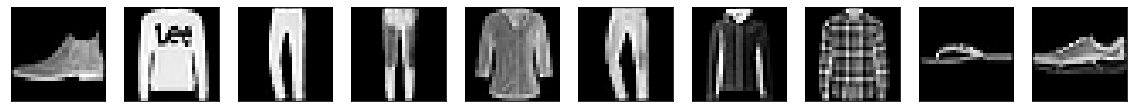

In [276]:

n = 10  # This is the count of how many digits we will display
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):

    # Input for the before reconstruction using Matplotlib
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



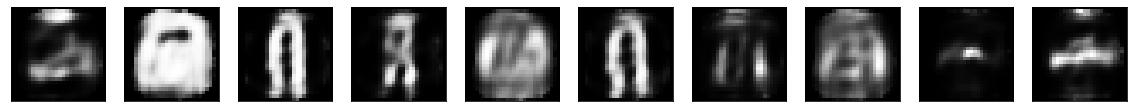

In [277]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):

# Input for the after reconstruction using Matplotlib
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Repeat the question 2 on the denoisening autoencoder**

In [278]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [287]:
#Here we are fitting the model after de noising
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/30
235/235 [==============================] - 3s 14ms/step - loss: 0.5081 - accuracy: 0.0030 - val_loss: 0.4341 - val_accuracy: 0.0118
Epoch 2/30
235/235 [==============================] - 3s 13ms/step - loss: 0.5071 - accuracy: 0.0030 - val_loss: 0.4331 - val_accuracy: 0.0117
Epoch 3/30
235/235 [==============================] - 3s 14ms/step - loss: 0.5061 - accuracy: 0.0029 - val_loss: 0.4322 - val_accuracy: 0.0118
Epoch 4/30
235/235 [==============================] - 3s 14ms/step - loss: 0.5052 - accuracy: 0.0029 - val_loss: 0.4313 - val_accuracy: 0.0119
Epoch 5/30
235/235 [==============================] - 3s 14ms/step - loss: 0.5042 - accuracy: 0.0029 - val_loss: 0.4304 - val_accuracy: 0.0119
Epoch 6/30
235/235 [==============================] - 3s 14ms/step - loss: 0.5033 - accuracy: 0.0029 - val_loss: 0.4295 - val_accuracy: 0.0119
Epoch 7/30
235/235 [==============================] - 3s 15ms/step - loss: 0.5024 - accuracy: 0.0029 - val_loss: 0.4286 - val_accuracy: 0.0118

In [288]:
# Prediction of the given data here
decoded_imgs = autoencoder.predict(x_test_noisy)

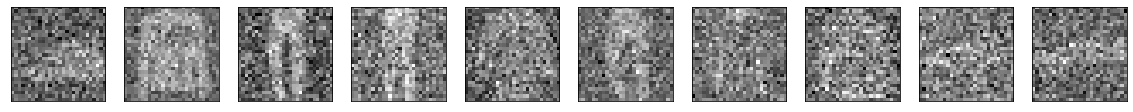

In [289]:
n = 10  # This is the count of how many digits we will display
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):
  
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


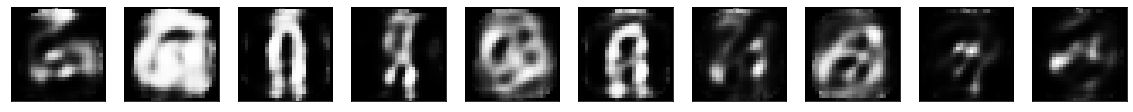

In [290]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()


In [283]:
#ENcoding and decoding the data and predicting it for reshaping the images

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

prediction = autoencoder.predict(x_test[1].reshape(1,784))

**plot loss and accuracy using the history object** 

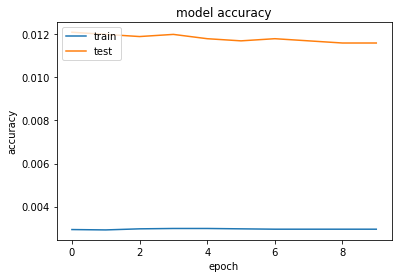

In [284]:
# Now here we summarizing the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

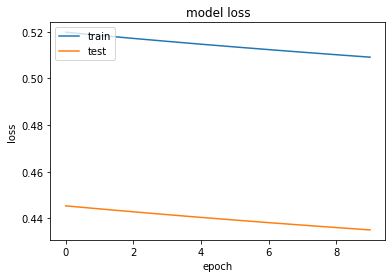

In [285]:
# Now here we summarizing the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**bonus Question**

**Visualize the compressed version of theinput data in the middle layer**

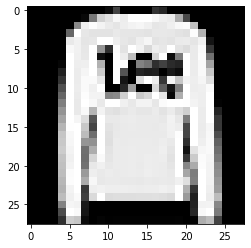

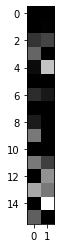

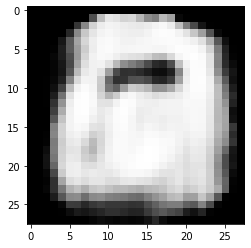

In [286]:
#Reshaping the image from middle
plt.imshow(x_test[1].reshape(28,28))
plt.show()

#Scaling up the given data
plt.imshow(encoded_imgs[1].reshape(16,2))
plt.show()

#Predicting the Given data 
plt.imshow(prediction.reshape(28,28))
plt.show()